## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_og = pd.read_csv("Absenteeism_data.csv")
pd.set_option("display.max_columns",None)

In [3]:
data_og.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


<AxesSubplot:>

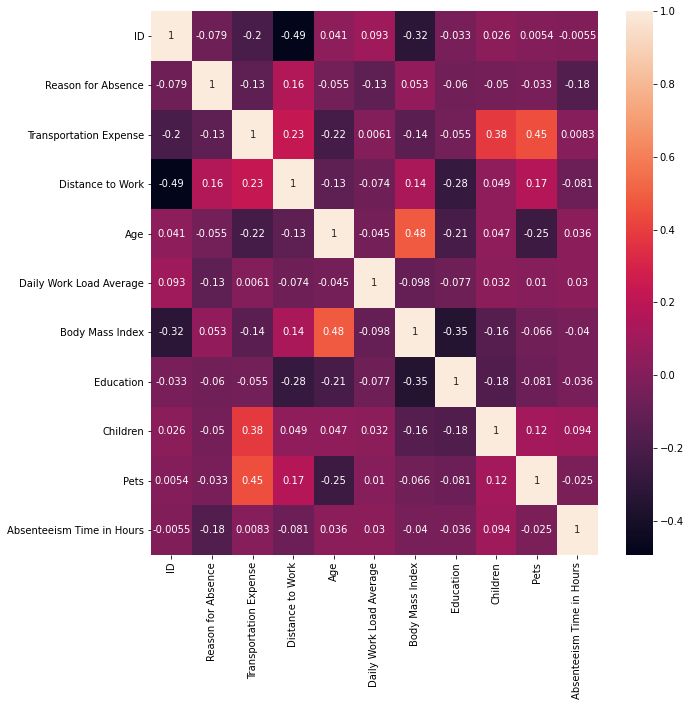

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(data_og.corr(),annot=True)

## Descriptive Statistics

In [5]:
data_og.shape

(700, 12)

In [6]:
data_og.nunique()

ID                            34
Reason for Absence            28
Date                         432
Transportation Expense        24
Distance to Work              24
Age                           21
Daily Work Load Average       35
Body Mass Index               16
Education                      4
Children                       5
Pets                           6
Absenteeism Time in Hours     19
dtype: int64

In [7]:
data_og.describe(include='all')

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
unique,NaN,NaN,432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,17/08/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,17.951429,19.411429,NaN,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,NaN,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,NaN,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,NaN,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,NaN,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,NaN,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000


## Checking for missing data

In [8]:
data_og.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

## Checking for duplicates

In [9]:
data_og.duplicated().sum()

8

In [10]:
data_og[data_og.duplicated()]

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
127,34,27,11/01/2016,118,10,37,308.593,28,1,0,0,2
128,34,27,12/01/2016,118,10,37,308.593,28,1,0,0,2
131,34,27,13/01/2016,118,10,37,308.593,28,1,0,0,2
305,5,23,19/10/2016,235,20,43,265.017,38,1,1,0,2
388,3,27,22/02/2017,179,51,38,251.818,31,1,0,0,3
389,3,27,24/02/2017,179,51,38,251.818,31,1,0,0,3
477,24,28,25/07/2017,246,25,41,230.290,23,1,0,0,2
496,24,28,05/09/2017,246,25,41,261.756,23,1,0,0,1


In [11]:
data_og.drop_duplicates(keep='first',inplace=True)

In [12]:
data_og.shape

(692, 12)

In [13]:
data_og.reset_index(inplace=True,drop=True)

## Types of Data

In [14]:
# Continuous
continuous_cols = ['Transportation Expense','Distance to Work','Age','Daily Work Load Average','Body Mass Index','Absenteeism Time in Hours']
# Categorical
categorical_cols = ['ID','Reason for Absence','Education','Children','Pets']
# Temporal
temporal_cols = ['Date']

In [15]:
for i in categorical_cols:
    data_og[i] = data_og[i].astype('object')

Converting 28 reasons of absence into 4 broad categories

In [16]:
disease = list(np.arange(0,15))
childbirth = list(np.arange(15,18))
abnormal = list(np.arange(18,22))
general = list(np.arange(22,29))
l = []
for i in range(len(data_og)):
    if data_og['Reason for Absence'][i] in disease:
        l.append('disease')
    elif data_og['Reason for Absence'][i] in childbirth:
        l.append('childbirth')
    elif data_og['Reason for Absence'][i] in abnormal:
        l.append('abnormal')
    elif data_og['Reason for Absence'][i] in general:
        l.append('general')
    else:
        l.append('Wrongly Classified')

In [17]:
data_og['Main_reason'] = l

In [18]:
data_og.head(5)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Main_reason
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4,general
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0,disease
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2,general
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4,disease
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2,general


# Outlier

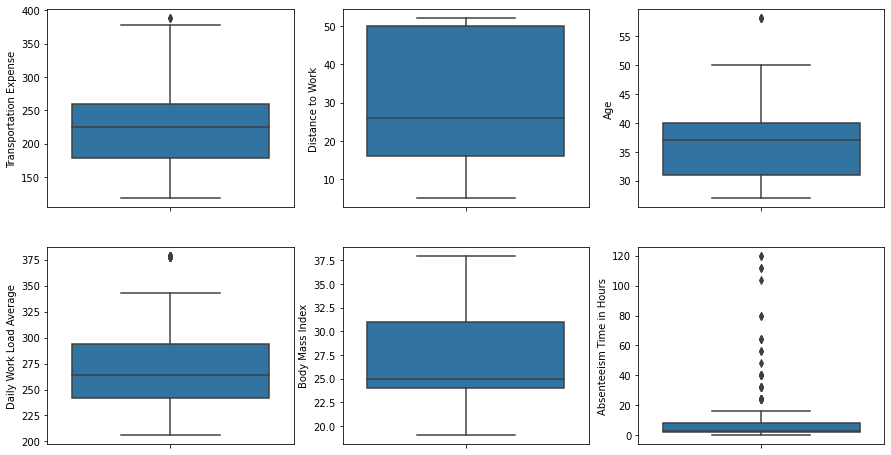

In [19]:
plt.figure(figsize=(15,8))
for i,col in enumerate(continuous_cols):
     i=i+1
     plt.subplot(2,3,i)    
     sns.boxplot(data = data_og, y = col)

Key Points:
1. Unique ID's are 34. This means that the dataset contains records of reason for absence of 34 individuals. ID's can be used for groupby at last. Check based on ID, avg absenteeism hours and reasons.

2. Duplicate records have been removed.

3. No missing values

4. Data Types needs to be explicitly changed

5. Check for outliers

6. Divide date column in day,month,year


In [20]:
data_og.dtypes

ID                            object
Reason for Absence            object
Date                          object
Transportation Expense         int64
Distance to Work               int64
Age                            int64
Daily Work Load Average      float64
Body Mass Index                int64
Education                     object
Children                      object
Pets                          object
Absenteeism Time in Hours      int64
Main_reason                   object
dtype: object

## Relationship between Categorical Columns

In [21]:
data_og['Education'] = data_og['Education'].astype('object')

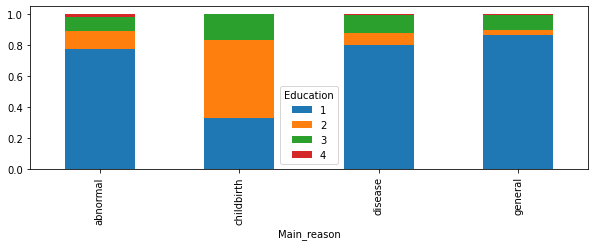

In [22]:
# Education and Reason for Absence
ER = pd.crosstab(data_og['Main_reason'],data_og['Education'])
ER.div(ER.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(10,3))
plt.show()

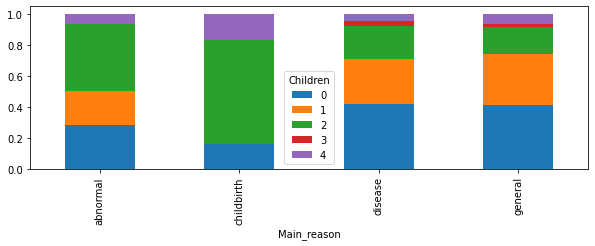

In [24]:
# Children and Reason for Absence
CR = pd.crosstab(data_og['Main_reason'],data_og['Children'])
CR.div(CR.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(10,3))
plt.show()

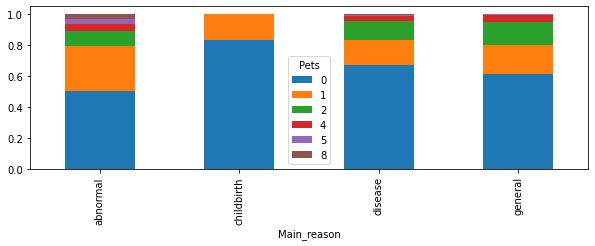

In [25]:
# Pets and Reason for Absence
PR = pd.crosstab(data_og['Main_reason'],data_og['Pets'])
PR.div(PR.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(10,3))
plt.show()

## Reason and absenteeism Time

In [30]:
data_og.groupby('Main_reason')['Absenteeism Time in Hours'].agg(['mean','min','max'])

,mean,min,max
Main_reason,,,
abnormal,14.984127,1,104
childbirth,5.000000,1,8
disease,10.652582,0,120
general,3.592683,0,24


In [33]:
data_og['In days'] = data_og['Absenteeism Time in Hours']/24

In [34]:
data_og.groupby('Main_reason')['In days'].agg(['mean','min','max'])

,mean,min,max
Main_reason,,,
abnormal,0.624339,0.041667,4.333333
childbirth,0.208333,0.041667,0.333333
disease,0.443858,0.000000,5.000000
general,0.149695,0.000000,1.000000


In [40]:
categorical_cols

['ID', 'Reason for Absence', 'Education', 'Children', 'Pets']

<AxesSubplot:xlabel='Main_reason'>

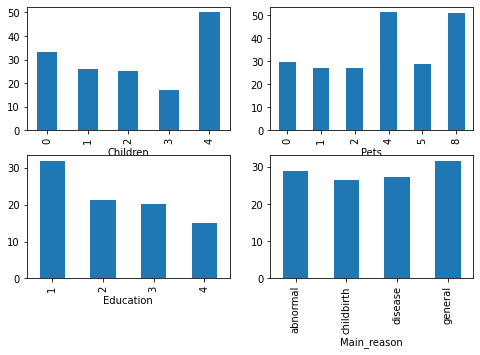

In [44]:
plt.figure(figsize=(8,5))
plt.subplot(2,2,1)
data_og.groupby('Children')['Distance to Work'].mean().plot(kind='bar')
plt.subplot(2,2,2)
data_og.groupby('Pets')['Distance to Work'].mean().plot(kind='bar')
plt.subplot(2,2,3)
data_og.groupby('Education')['Distance to Work'].mean().plot(kind='bar')
plt.subplot(2,2,4)
data_og.groupby('Main_reason')['Distance to Work'].mean().plot(kind='bar')

In [83]:
data_og.groupby('ID').agg({'Age':'mean','Absenteeism Time in Hours':'sum','Main_reason':set,'Children':'max','Transportation Expense':'mean', 'Distance to Work':'mean','Body Mass Index':'mean','Education':'max','Pets':'max'})

,Age,Absenteeism Time in Hours,Main_reason,Children,Transportation Expense,Distance to Work,Body Mass Index,Education,Pets
ID,,,,,,,,,
1,37.0,117,"{abnormal, disease, general}",1,235.0,11.0,29.0,3,1
2,48.0,25,"{abnormal, disease, general}",1,235.0,29.0,33.0,1,5
3,38.0,476,"{abnormal, disease, general}",0,179.0,51.0,31.0,1,0
5,43.0,98,"{abnormal, disease, general}",1,235.0,20.0,38.0,1,0
6,33.0,56,"{abnormal, disease, general}",2,189.0,29.0,25.0,1,2
7,39.0,30,"{disease, general}",2,279.0,5.0,24.0,1,0
8,39.0,0,{disease},2,231.0,35.0,35.0,1,2
9,58.0,134,"{abnormal, disease, general}",2,228.0,14.0,22.0,1,1
10,28.0,170,"{abnormal, disease, general}",1,361.0,52.0,27.0,1,4


In [79]:
r = data_og.groupby(['ID'])['Main_reason'].apply(lambda x: ','.join(x)).reset_index()
print(r['Main_reason'][0])

TypeError: unhashable type: 'list'